# 1. Análise exploratória de dados


In [ ]:
import opendatasets as od
import pandas
import cv2
import os
import pandas as pd
import imagehash
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


### 1.1. Download do Dataset

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install imagehash

In [ ]:
od.download("https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification")

In [ ]:
!ls

## 1.2. Descrição dos dados

**Estrutura do conjunto de dados**
O conjunto de dados é organizado em uma estrutura de pasta hierárquica para garantir fácil navegação e acessibilidade. A pasta principal, chamada "imagens", contém subpastas que representam categorias ou itens específicos de resíduos. Esses nomes de subpastas servem como rótulos para suas respectivas categorias, tornando conveniente para pesquisadores e desenvolvedores identificar e utilizar as imagens para suas necessidades específicas.

Dentro de cada subpasta de categoria, há duas pastas distintas:

1. default: Esta pasta contém imagens padrão ou de estúdio do item de resíduo. Essas imagens fornecem uma representação clara e controlada do item, o que pode ser útil para treinamento inicial e teste de modelos de classificação de resíduo. Cada subpasta "padrão" contém 250 imagens.
2. real_world: Esta pasta contém imagens do item de resíduo em cenários ou ambientes do mundo real. Essas imagens capturam o item em vários contextos, como em uma lata de lixo, no chão ou em um ambiente desorganizado. As imagens do mundo real são essenciais para avaliar o desempenho e a robustez dos modelos de classificação de resíduos em ambientes práticos. Cada subpasta "real_world" também contém 250 imagens.

Todas as imagens no conjunto de dados são fornecidas no **formato PNG**, garantindo alta qualidade e compatibilidade com uma ampla variedade de bibliotecas de processamento de imagens e aprendizado de máquina. O ```Recyclable and Household Waste Classification Dataset``` oferece uma ampla gama de possibilidades para pesquisadores, engenheiros e entusiastas ambientais. Alguns usos e aplicações potenciais deste conjunto de dados incluem:

- Desenvolvendo e treinando modelos de machine learning para classificação e categorização automática de resíduos;
- Analise das características visuais e recursos de diferentes materiais residuais;
- Comparação o desempenho de algoritmos de classificação de resíduos em imagens padrão e do mundo real;
- Investigar o impacto de cenários do mundo real na precisão do reconhecimento de resíduos.

# 2. Dataframe com os metadados das imagens

In [ ]:

count_corrupted = 0
corrupted = list()

In [ ]:
root_dir = './recyclable-and-household-waste-classification/images/images'

all_images = []

# Percorrer os diretórios e subdiretórios de imagens
for folders in os.listdir(root_dir):
    child_dir = os.path.join(root_dir, folders)
    if os.path.isdir(child_dir):
        for sub_dir in ['default', 'real_world']:
            sub_dir_path = os.path.join(child_dir, sub_dir)
            if os.path.isdir(sub_dir_path):
                for image in os.listdir(sub_dir_path):
                    img_dir = os.path.join(sub_dir_path, image)
                    if img_dir.endswith(('.jpg', '.png')):
                        img = cv2.imread(img_dir)
                        if img is not None:
                            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                            img_pil = Image.fromarray(img_rgb)
                            img_hash = imagehash.phash(img_pil)
                            width, height, channels = img.shape
                            img_corrupted = False
                        else:
                            count_corrupted += 1
                            corrupted.append(img_dir)
                            img_corrupted = True
                            img_hash, width, height, channels = None, None, None, None

                        all_images.append([img_dir, img_corrupted, str(img_hash), image.split('.')[-1], width, height, channels, folders])

In [ ]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [ ]:
df = pd.DataFrame(all_images, columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'])
df

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./recyclable-and-household-waste-classificatio...,False,bf94c45bcc439869,png,256,256,3,paper_cups
1,./recyclable-and-household-waste-classificatio...,False,bab0854f6cb427ca,png,256,256,3,paper_cups
2,./recyclable-and-household-waste-classificatio...,False,dbf00c8ff04b3724,png,256,256,3,paper_cups
3,./recyclable-and-household-waste-classificatio...,False,8b85c47a3f94c26b,png,256,256,3,paper_cups
4,./recyclable-and-household-waste-classificatio...,False,b552caad455037cb,png,256,256,3,paper_cups
...,...,...,...,...,...,...,...,...
14995,./recyclable-and-household-waste-classificatio...,False,fe00b44ac235cf6b,png,256,256,3,glass_cosmetic_containers
14996,./recyclable-and-household-waste-classificatio...,False,854afab5056af895,png,256,256,3,glass_cosmetic_containers
14997,./recyclable-and-household-waste-classificatio...,False,a79de448d868ccb5,png,256,256,3,glass_cosmetic_containers
14998,./recyclable-and-household-waste-classificatio...,False,be9dc1622e9d9066,png,256,256,3,glass_cosmetic_containers


### 3. Verificar a Integridade dos Arquivos

In [ ]:
#Informações estatísticas dos valores de altura, largura e canais das imagens
df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,256.0,256.0,3.0
std,0.0,0.0,0.0
min,256.0,256.0,3.0
max,256.0,256.0,3.0


<Axes: title={'center': 'Número de Imagens por Formato'}, xlabel='image_format'>

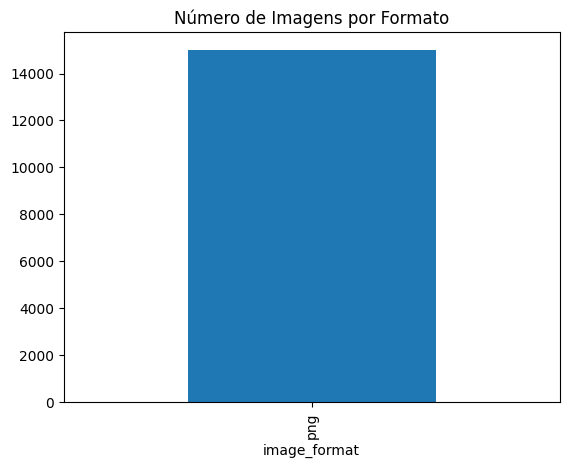

In [ ]:
#Quantidade de Imagens por formato (JPG, PNG, etc.)
df['image_format'].value_counts().plot(kind='bar', title='Número de Imagens por Formato')

### 4. Verificar a Consistência dos Metadados

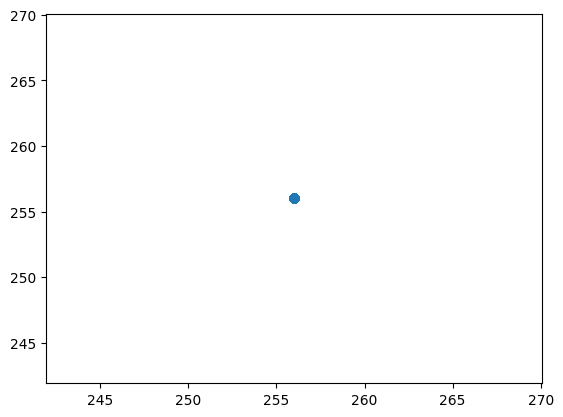

In [ ]:
#Distribuição das Dimensões de Altura e Largura das Imagens

plt.scatter(df['width'], df['height'])

Este Dataset contêm uma coleção de 15.00 imagens e todas elas tem 256x256 pixels.

In [ ]:
#Quantidade de informações nulas
df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


### 5. Analisar a Qualidade das Imagens

In [ ]:
#Total de imagens corrompidas

df['corrupted'].sum()

NameError: name 'df' is not defined

### 6. Verificar a Distribuição das Classes

In [ ]:
total_images = sorted(os.listdir(root_dir))

objs = []
for cls in total_images:
    obj = cls.split("___")[0]
    if obj not in objs:
        objs.append(obj)

num_objs = len(objs)
print(f"Número de Recicláveis: {num_objs} categorias")
print("Tipos de Reciclávieis: ")
for i, obj in enumerate(objs):
    print(f"{i+1}. {obj}")

Número de Recicláveis: 30 categorias
Tipos de Reciclávieis: 
1. aerosol_cans
2. aluminum_food_cans
3. aluminum_soda_cans
4. cardboard_boxes
5. cardboard_packaging
6. clothing
7. coffee_grounds
8. disposable_plastic_cutlery
9. eggshells
10. food_waste
11. glass_beverage_bottles
12. glass_cosmetic_containers
13. glass_food_jars
14. magazines
15. newspaper
16. office_paper
17. paper_cups
18. plastic_cup_lids
19. plastic_detergent_bottles
20. plastic_food_containers
21. plastic_shopping_bags
22. plastic_soda_bottles
23. plastic_straws
24. plastic_trash_bags
25. plastic_water_bottles
26. shoes
27. steel_food_cans
28. styrofoam_cups
29. styrofoam_food_containers
30. tea_bags


<ipython-input-104-10c99327d2df>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='count', data=category_counts, palette='Blues_d')


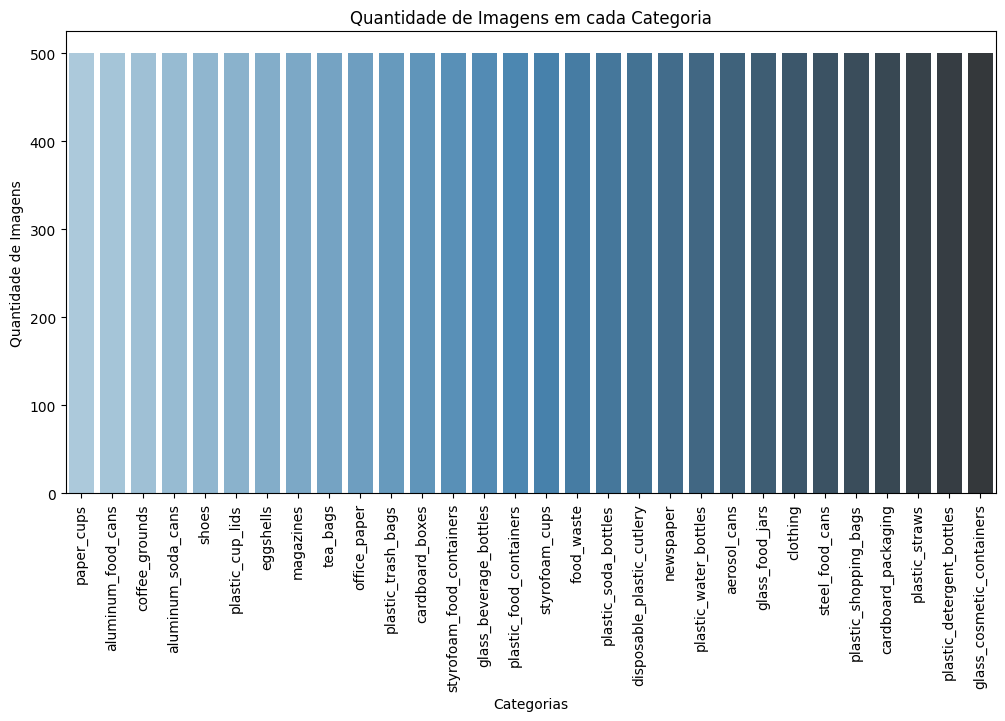

In [ ]:
#Número de Imagens por Classe


df_images = pd.DataFrame(all_images, columns=['img_dir', 'img_corrupted', 'img_hash', 'image_format', 'width', 'height', 'channels', 'class'])

category_counts = df_images['class'].value_counts().reset_index()
category_counts.columns = ['class', 'count']

# Adicionar rótulos e título
plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='count', data=category_counts, palette='Blue')
plt.xticks(rotation=90)
plt.title('Quantidade de Imagens em cada Categoria')
plt.ylabel('Quantidade de Imagens')
plt.xlabel('Categorias')
plt.show()

### 7. Verificar a Presença de Duplicatas

In [ ]:
#Quantidade de imagens duplicatas
df_images['img_hash'].duplicated().sum()

5149

In [ ]:
#Imagens duplicatas
df_duplicated = df_images[df_images['img_hash'].duplicated()]
df_duplicated

,img_dir,img_corrupted,img_hash,image_format,width,height,channels,class
64,./recyclable-and-household-waste-classificatio...,False,96c278373937523a,png,256,256,3,paper_cups
69,./recyclable-and-household-waste-classificatio...,False,bfdbd084c4261f0b,png,256,256,3,paper_cups
77,./recyclable-and-household-waste-classificatio...,False,fa25c19c92d08f6b,png,256,256,3,paper_cups
85,./recyclable-and-household-waste-classificatio...,False,d019036ee1b56d6b,png,256,256,3,paper_cups
87,./recyclable-and-household-waste-classificatio...,False,e9609e69962d9696,png,256,256,3,paper_cups
...,...,...,...,...,...,...,...,...
14994,./recyclable-and-household-waste-classificatio...,False,bd94c0393ec6cd91,png,256,256,3,glass_cosmetic_containers
14995,./recyclable-and-household-waste-classificatio...,False,fe00b44ac235cf6b,png,256,256,3,glass_cosmetic_containers
14997,./recyclable-and-household-waste-classificatio...,False,a79de448d868ccb5,png,256,256,3,glass_cosmetic_containers
14998,./recyclable-and-household-waste-classificatio...,False,be9dc1622e9d9066,png,256,256,3,glass_cosmetic_containers


In [ ]:
duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['img_hash']
  duplicated = df_images[df_images['img_hash'] == hash_duplicated]["img_dir"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

In [ ]:
#Imagens correspondentes a cada imagem duplicada
duplicated_images

{'96c278373937523a': ['./recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_138.png',
  './recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_83.png'],
 'bfdbd084c4261f0b': ['./recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_12.png',
  './recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_78.png',
  './recyclable-and-household-waste-classification/images/images/paper_cups/real_world/Image_123.png',
  './recyclable-and-household-waste-classification/images/images/paper_cups/real_world/Image_147.png'],
 'fa25c19c92d08f6b': ['./recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_192.png',
  './recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_202.png',
  './recyclable-and-household-waste-classification/images/images/plastic_cup_lids/default/Image_220.png'],
 'd019036ee1b56d6b': ['./rec

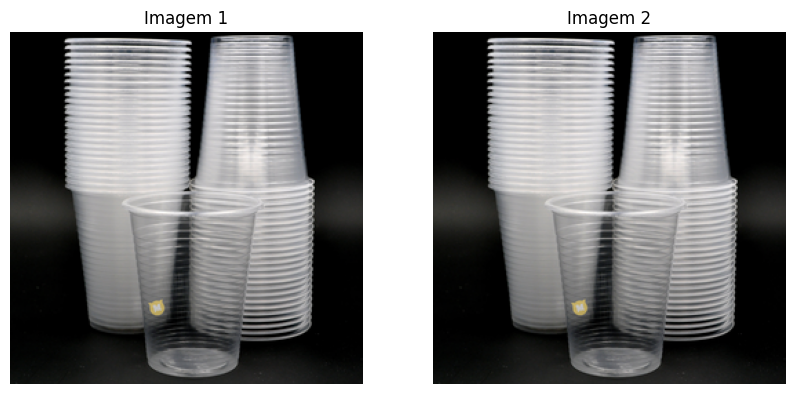

In [ ]:
image1 = cv2.imread('./recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_138.png')
image2 = cv2.imread('./recyclable-and-household-waste-classification/images/images/paper_cups/default/Image_83.png')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem 1')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem 2')

# Exibir as imagens
plt.show()